In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [544]:
def regres(train_X, train_y, test_X, test_y):
    reg = LinearRegression().fit(train_X, train_y)
    predictions = reg.predict(test_X)
    print(f'MSE: {mean_squared_error(test_y, predictions)}')
    print('R2 Score на test:', r2_score(test_y, predictions))
    print('R2 Score на train:', reg.score(train_X, train_y))

In [545]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def scaler(train_X, test_X):
    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.fit_transform(test_X)
    return train_X, test_X

### Загрузка данных

In [546]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [547]:
df.isna().sum() #пропусков в данных пока не видно

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [548]:
df = df.drop_duplicates()
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [549]:
df = df.drop(['name'], axis=1)

In [550]:
X = df.drop(["selling_price"], axis=1)
y = df[["selling_price"]]

In [551]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [552]:
df.nunique().sort_values()

transmission       2
seller_type        3
fuel               5
owner              5
year              27
selling_price    445
km_driven        770
dtype: int64

In [553]:
numerical = ['year', 'km_driven']
categorial = ['transmission', 'seller_type', 'fuel', 'owner']

In [554]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_X[categorial])

#сначала данные train
features_name = enc.get_feature_names_out(categorial)
train_X[features_name]= enc.transform(train_X[categorial]).toarray()
train_X = train_X.drop(categorial, axis=1)
#теперь данные test
test_X[features_name]= enc.transform(test_X[categorial]).toarray()
test_X = test_X.drop(categorial, axis=1)

In [555]:
train_X

,year,km_driven,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3845,2014,145000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1604,2015,60000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3386,2013,70000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3368,2007,85000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4166,2015,77000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2013,40771,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1437,2012,120000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
977,2018,50000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4221,2017,35000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [556]:
regres(train_X, train_y, test_X, test_y)

MSE: 165345455448.71844
R2 Score на test: 0.43443007390362864
R2 Score на train: 0.4341882623326643


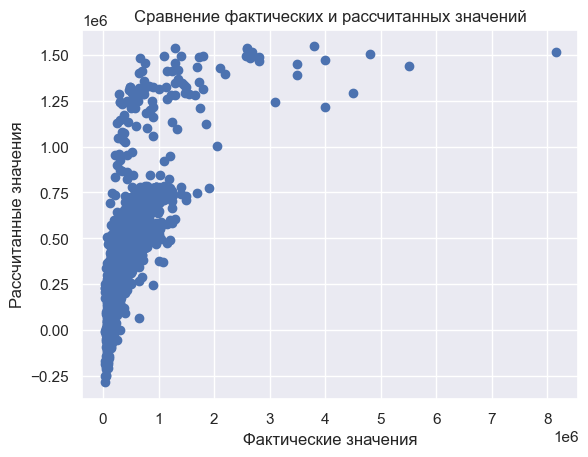

In [557]:
# Обучаем модель множественной регрессии
model = LinearRegression()
name = 'LinearRegression'
model.fit(train_X, train_y)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(test_X)

# Создаем график с фактическими и рассчитанными значениями
plt.scatter(test_y, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

Для такого количества наблюдений признаков не так много, поэтому попробуем создать полиномиальные признаки

In [558]:
poly = PolynomialFeatures(2)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out(train_X.columns))
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [559]:
test_X = test_X.drop(['1'], axis=1)
train_X = train_X.drop(['1'], axis=1)

In [560]:
train_X

,year,km_driven,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,...,owner_Fourth & Above Owner^2,owner_Fourth & Above Owner owner_Second Owner,owner_Fourth & Above Owner owner_Test Drive Car,owner_Fourth & Above Owner owner_Third Owner,owner_Second Owner^2,owner_Second Owner owner_Test Drive Car,owner_Second Owner owner_Third Owner,owner_Test Drive Car^2,owner_Test Drive Car owner_Third Owner,owner_Third Owner^2
0,2014.0,145000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,60000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013.0,70000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2007.0,85000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2015.0,77000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2013.0,40771.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2392,2012.0,120000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2393,2018.0,50000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2394,2017.0,35000.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [561]:
result = scaler(train_X, test_X)
regres(result[0], train_y, result[1], test_y)

MSE: 5.15190593330125e+35
R2 Score на test: -1.762227483086974e+24
R2 Score на train: 0.5312110023415558


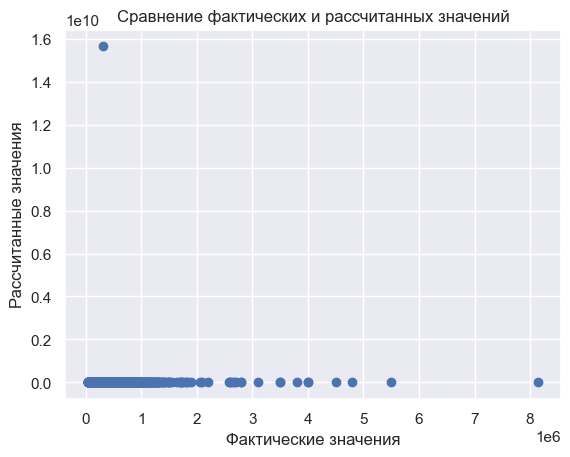

In [562]:
# Обучаем модель множественной регрессии
model = LinearRegression()
name = 'LinearRegression'
model.fit(train_X, train_y)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(test_X)

# Создаем график с фактическими и рассчитанными значениями
plt.scatter(test_y, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### Значение Шепли

In [144]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [143]:
import shap

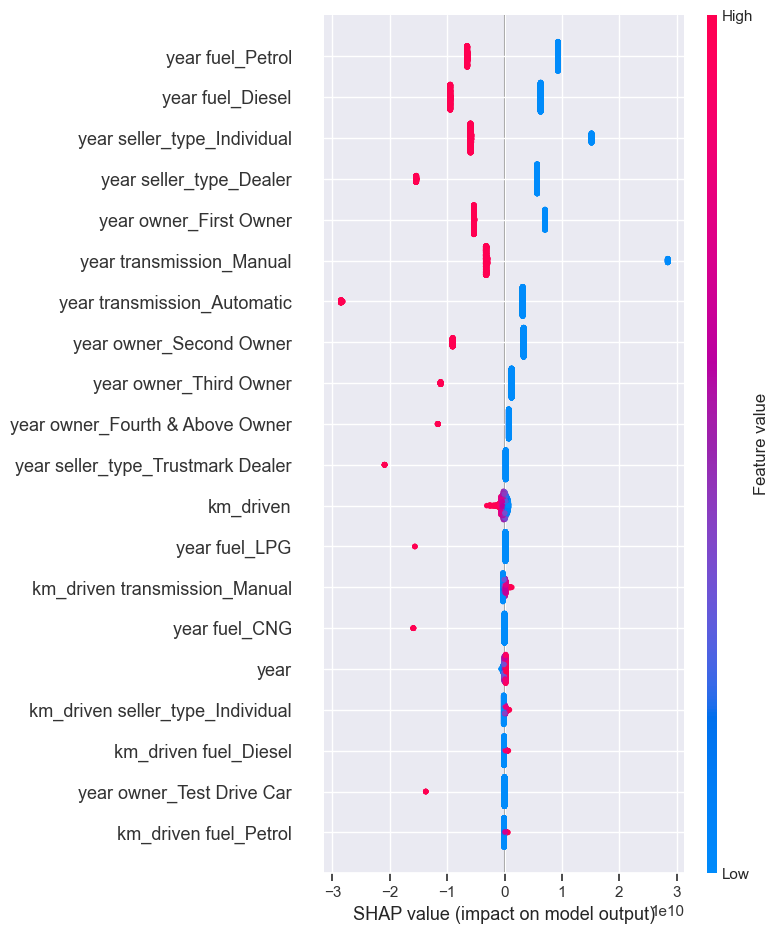

In [436]:
reg = LinearRegression().fit(train_X, train_y)
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X)

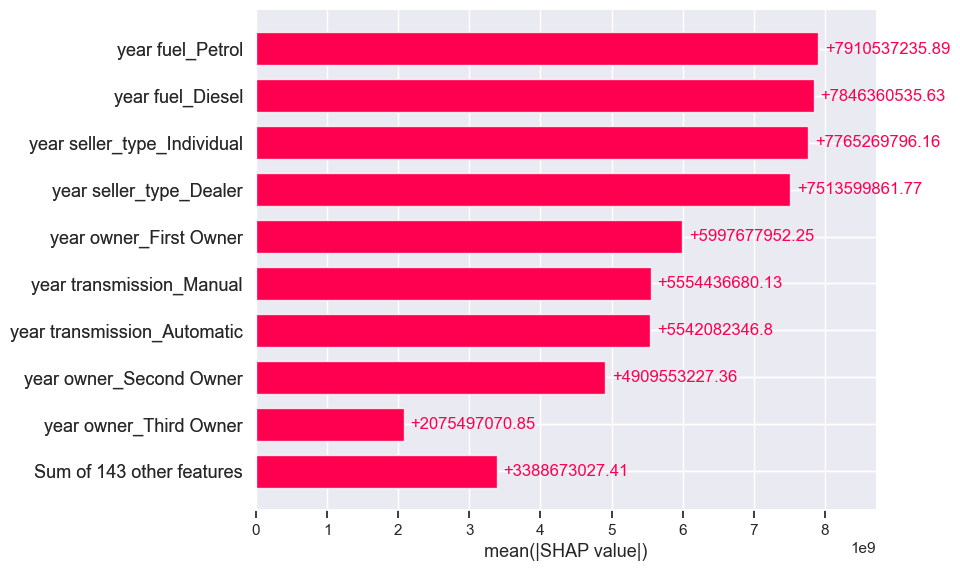

In [437]:
shap.plots.bar(shap_values)

In [438]:
test_X = test_X[['year fuel_Petrol', 'year fuel_Diesel', 'year seller_type_Individual', 'year owner_First Owner', 'year transmission_Manual', 'year transmission_Automatic', 'year owner_Second Owner', 'year owner_Third Owner']]
train_X = train_X[['year fuel_Petrol', 'year fuel_Diesel', 'year seller_type_Individual', 'year owner_First Owner', 'year transmission_Manual', 'year transmission_Automatic', 'year owner_Second Owner', 'year owner_Third Owner']]

In [440]:
result = scaler(train_X, test_X)
regres(result[0], train_y, result[1], test_y)

MSE: 168005445896.41803
R2 Score на test: 0.4253314833385611
R2 Score на train: 0.430566700597256


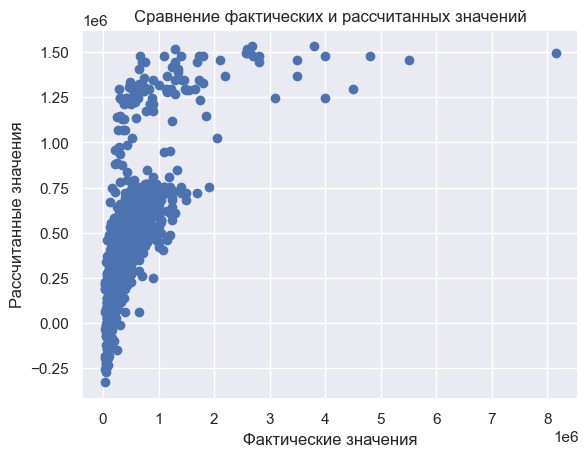

In [441]:
# Обучаем модель множественной регрессии
model = LinearRegression()
name = 'LinearRegression'
model.fit(train_X, train_y)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(test_X)

# Создаем график с фактическими и рассчитанными значениями
plt.scatter(test_y, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### PCA

In [216]:
from sklearn.decomposition import PCA

In [465]:
result = scaler(train_X, test_X)

In [466]:
pca = PCA(n_components=50, whiten=True)

In [467]:
pca = pca.fit(result[0])
train_X = pca.transform(result[0])
test_X = pca.transform(result[1])

In [468]:
regres(train_X, train_y, test_X, test_y)

MSE: 381786281213.31464
R2 Score на test: -0.3059133573670676
R2 Score на train: 0.5241790110566004


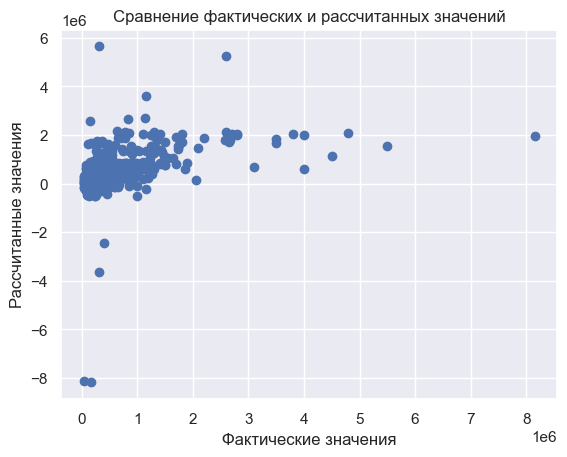

In [469]:
# Обучаем модель множественной регрессии
model = LinearRegression()
name = 'LinearRegression'
model.fit(train_X, train_y)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(test_X)

# Создаем график с фактическими и рассчитанными значениями
plt.scatter(test_y, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### Регрессия Lasso и Ridge

In [470]:
from sklearn.linear_model import Lasso, Ridge

In [489]:
result = scaler(train_X, test_X)

R^2 по модели: 0.5009160575795448
MSE 192586.4114243423


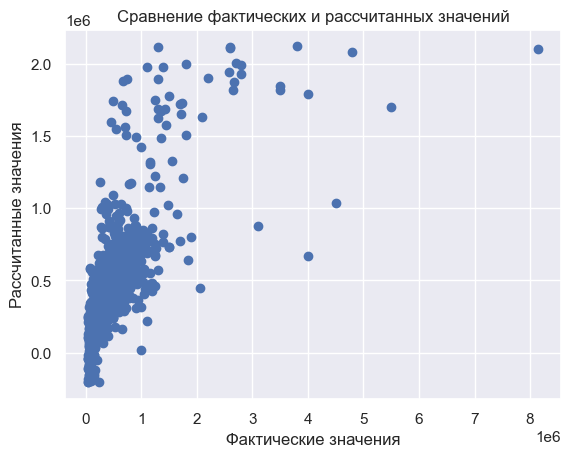

In [492]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(result[0], train_y)

# делаем прогнозы
predictions = model.predict(result[1])

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('R^2 по модели:', r2_score(test_y, predictions))
print('MSE', mean_absolute_error(test_y, predictions))

plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

In [514]:
result = scaler(train_X, test_X)

R^2 по модели: 0.5000607247103588
MSE 192797.823556644


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+14, tolerance: 5.821e+10


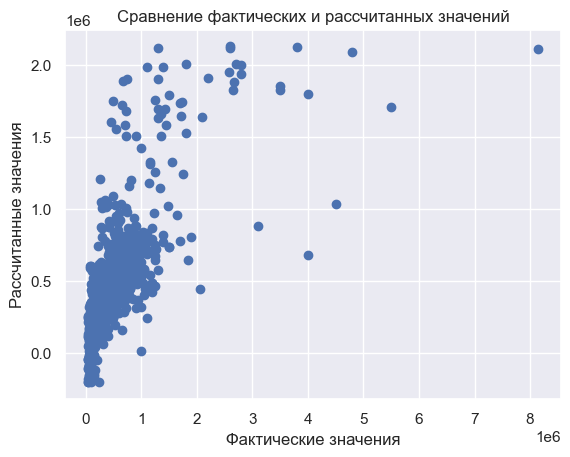

In [515]:
# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(result[0], train_y)


# делаем прогнозы
predictions = model.predict(result[1])

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('R^2 по модели:', r2_score(test_y, predictions))
print('MSE', mean_absolute_error(test_y, predictions))

plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### Дерево решений (регрессия)

In [516]:
from sklearn.tree import DecisionTreeRegressor

In [519]:
model = DecisionTreeRegressor()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

R2 на train: 0.9510421349693149
R2 на test: 0.0046126317652444015


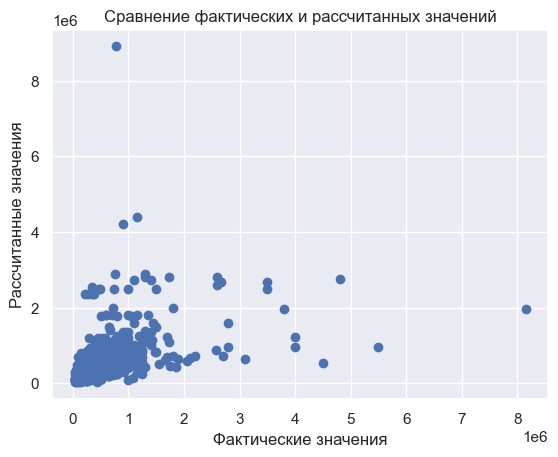

In [520]:
plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### K-means

In [521]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [564]:
model = KNeighborsClassifier(n_neighbors=3)

# Обучение модели на обучающем наборе
model.fit(result[0], train_y)
predictions = model.predict(result[1])
print(f'MSE: {mean_squared_error(test_y, predictions)}')
print('R2 Score:', r2_score(test_y, predictions))

MSE: 233514185301.6681
R2 Score: 0.20125654397269122


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


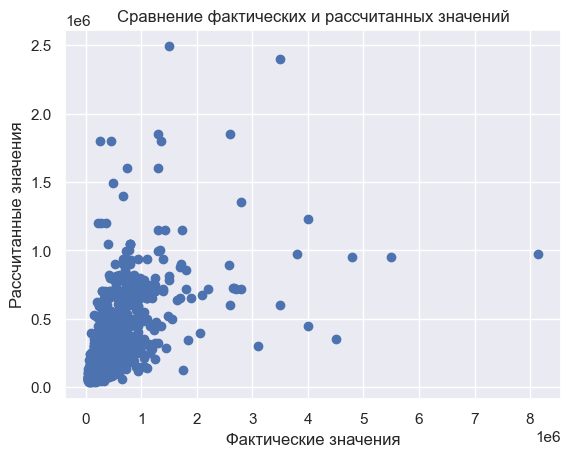

In [565]:
plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

### Дополнительные модели

In [566]:
from sklearn.neural_network import MLPClassifier

In [571]:
model = MLPClassifier()
model.fit(result[0], train_y)
predictions = model.predict(result[1])
print(f"R2 на train: {model.score(result[0], train_y)}")
print(f"R2 на test: {model.score(result[1], test_y)}")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


R2 на train: 0.2328881469115192
R2 на test: 0.03895004233700254


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


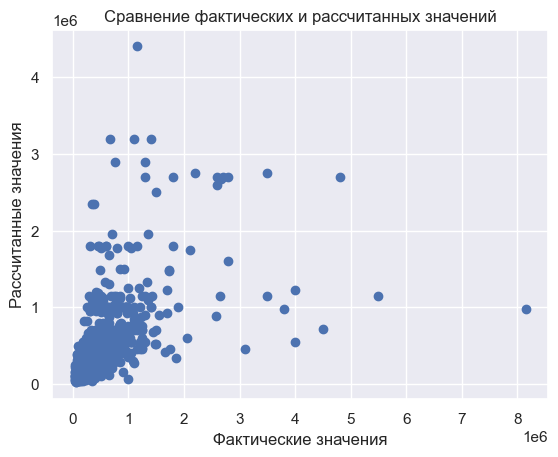

In [572]:
plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

In [573]:
from sklearn.svm import SVC

In [574]:
model = SVC()
model.fit(result[0], train_y)
predictions = model.predict(result[1])
print(f"R2 на train: {model.score(result[0], train_y)}")
print(f"R2 на test: {model.score(result[1], test_y)}")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


R2 на train: 0.08681135225375626
R2 на test: 0.04233700254022015


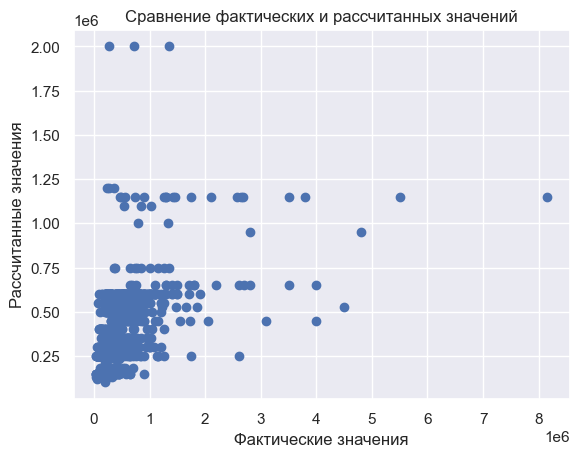

In [575]:
plt.scatter(test_y, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()

In [576]:
from sklearn.ensemble import RandomForestRegressor

In [583]:
# Создание и обучение модели RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(result[0], train_y)

# Прогнозирование на тестовом наборе
y_pred = model.predict(result[1])

# Оценка качества модели
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2_score(test_y, y_pred)}')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Squared Error: 155818859933.371
R^2: 0.4670161277927005


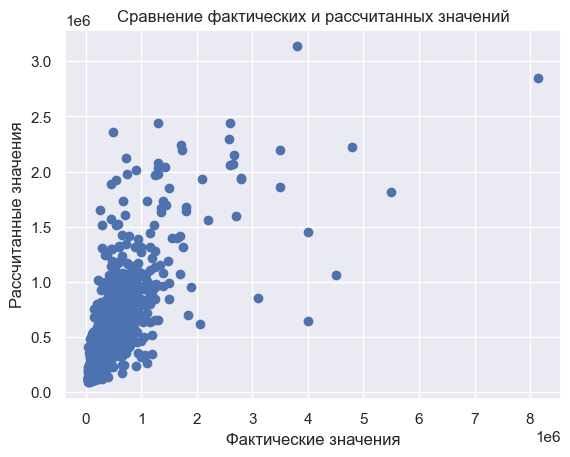

In [580]:
plt.scatter(test_y, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Рассчитанные значения')
plt.title('Сравнение фактических и рассчитанных значений')
plt.show()